## 探索數據
- 加入數據集
- 數據敘述統計

## 數據清理
- 空值填補
- 離群值處理（四分位數法）

## 特徵分析
- 皮爾森相關係數
- 主成分分析(降維度)
- 數據不平衡

## 數據不平衡
- 過採樣
- 集成學習


In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Load the Data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
features = [c for c in train.columns if c not in ['ID_code', 'target']]

In [4]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [5]:
train.dtypes

ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
var_3      float64
var_4      float64
var_5      float64
var_6      float64
var_7      float64
var_8      float64
var_9      float64
var_10     float64
var_11     float64
var_12     float64
var_13     float64
var_14     float64
var_15     float64
var_16     float64
var_17     float64
var_18     float64
var_19     float64
var_20     float64
var_21     float64
var_22     float64
var_23     float64
var_24     float64
var_25     float64
var_26     float64
var_27     float64
            ...   
var_170    float64
var_171    float64
var_172    float64
var_173    float64
var_174    float64
var_175    float64
var_176    float64
var_177    float64
var_178    float64
var_179    float64
var_180    float64
var_181    float64
var_182    float64
var_183    float64
var_184    float64
var_185    float64
var_186    float64
var_187    float64
var_188    float64
var_189    float64
var_190    float64
var_191    f

In [6]:
print(train.shape)
display(train.head(10))

(200000, 202)


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
6,train_6,0,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,...,8.7830,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097
7,train_7,0,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,...,13.1700,6.5491,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806
8,train_8,0,16.1071,2.4426,13.9307,5.6327,8.8014,6.1630,4.4514,10.1854,...,1.4298,14.7510,1.6395,1.4181,14.8370,-1.9940,-1.0733,8.1975,19.5114,4.8453
9,train_9,0,12.5088,1.9743,8.8960,5.4508,13.6043,-16.2859,6.0637,16.8410,...,0.5543,6.3160,1.0371,3.6885,14.8344,0.4467,14.1287,7.9133,16.2375,14.2514


In [7]:
print(test.shape)
display(test.head(10))

(200000, 201)


,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846
5,test_5,5.9862,-2.2913,8.6058,7.0685,14.2465,-8.6761,4.2467,14.7632,1.8790,...,-2.1115,7.1178,-0.4249,8.8781,14.9438,-2.2151,-6.0233,9.8117,17.1127,10.8240
6,test_6,8.4624,-6.1065,7.3603,8.2627,12.0104,-7.2073,4.1670,13.0809,-4.3004,...,12.3609,6.8661,4.0971,8.8484,17.5010,0.0295,7.7443,9.1509,18.4736,5.1499
7,test_7,17.3035,-2.4212,13.3989,8.3998,11.0777,9.6449,5.9596,17.8477,-4.8068,...,4.4676,4.4214,0.9303,1.4994,15.2648,-1.7931,6.5316,10.4855,23.4631,0.7283
8,test_8,6.9856,0.8402,13.7161,4.7749,8.6784,-13.7607,4.3386,14.5843,2.5883,...,-3.4657,7.8754,2.4698,-0.0362,16.7144,0.1221,-1.4328,9.9207,16.9865,-3.3304
9,test_9,10.3811,-6.9348,14.6690,9.0941,11.9058,-10.8018,3.4508,20.2816,-1.4112,...,1.8052,11.0723,0.8907,4.7680,15.1425,0.6075,-4.4447,9.5788,15.8146,9.3457


In [8]:
#資料集敘述統計
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [9]:
test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


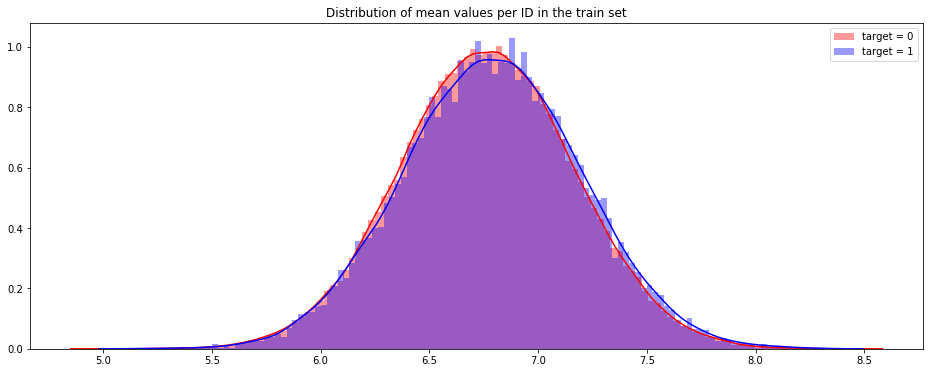

In [4]:
a0 = train.loc[train['target'] == 0]
a1 = train.loc[train['target'] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per ID in the train set")
sns.distplot(a0[features].mean(axis=1),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(a1[features].mean(axis=1),color="blue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

## 數據清理

In [5]:
#檢查整體train和test資料集是否有缺失值
print((train.isnull().sum()).sum())
print((test.isnull().sum()).sum())

0
0


In [6]:
#查看異常值
def plot_boxplot(train,features):
    i=0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax=plt.subplots(10,5,figsize=(18,24))
    
    for feature in features:
        i+=1
        plt.subplot(10,5,i)
        sns.boxplot(train[feature])
        plt.xlabel=(feature)
        locs,labels=plt.xticks()
        plt.tick_params(axis='x',labelsize=6,pad=-6)
        plt.tick_params(axis='y',labelsize=6)
plt.show()

<Figure size 432x288 with 0 Axes>

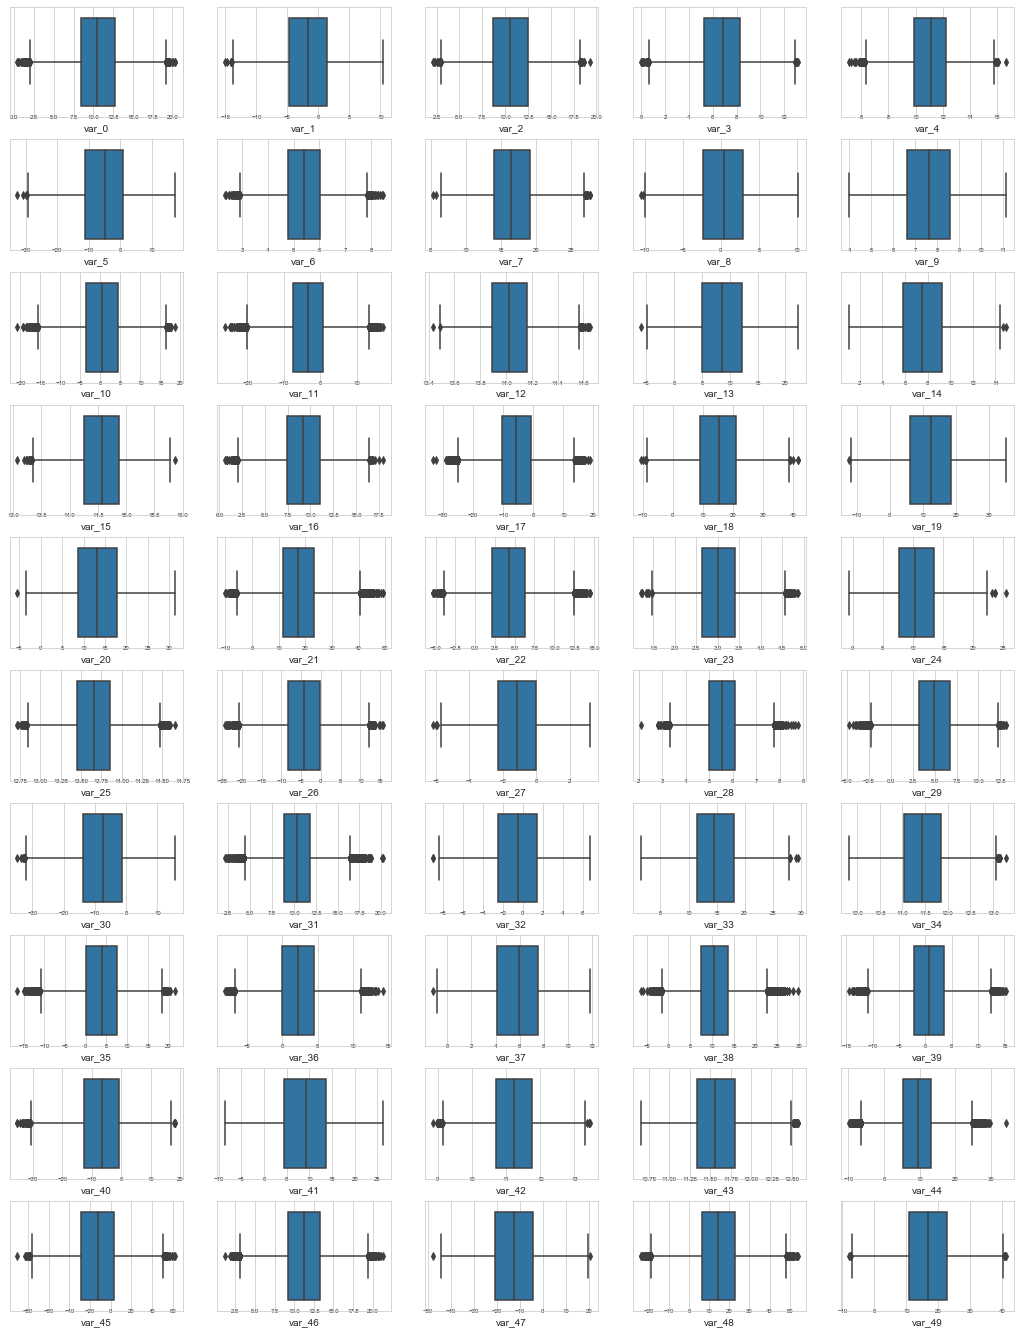

In [7]:
features=train.columns.values[2:52]
plot_boxplot(train,train[features])

In [8]:
# Outlier detection 
import pandas as pd
import numpy as np
from collections import Counter

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step)| (df[col] > Q3 + outlier_step )].index
        #outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(train,0,train[features])


In [9]:
train.loc[Outliers_to_drop]

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
1901,train_1901,0,19.2893,-6.6190,9.2233,8.1546,9.6044,0.4922,5.4389,13.5829,...,10.8734,3.1431,4.9796,5.5966,19.8221,0.8586,8.8525,7.5988,16.0018,8.3490
2155,train_2155,0,1.3350,1.0430,12.4502,10.4390,9.8652,3.5139,3.0010,23.4464,...,13.6810,7.3315,2.7532,5.9905,15.9505,-0.7203,5.7009,8.3637,16.8214,-13.7205
4240,train_4240,0,1.6044,-0.6302,13.3016,9.2546,12.1484,14.9502,5.3026,21.6465,...,8.6212,2.3420,-0.1535,5.4540,14.9938,0.6168,4.8250,9.4810,17.8768,-2.3349
5905,train_5905,0,1.9220,-3.3100,8.3762,7.9752,11.1864,-22.9135,7.5299,21.7287,...,6.8971,7.4950,1.4183,8.4255,17.4718,2.9003,1.6116,10.1197,14.3000,2.7114
10693,train_10693,0,0.5979,-0.7717,8.4321,7.1216,11.0864,-11.1819,7.2443,15.5612,...,-3.2289,10.3603,2.2347,1.6486,17.3712,-3.6116,0.4931,10.1748,15.7862,-6.9688
15375,train_15375,0,1.7243,-3.2251,10.0923,5.2447,11.8390,5.9802,4.8923,11.8679,...,3.2474,14.6074,1.2890,7.7854,15.3017,0.7544,-5.1358,9.3011,12.5771,-2.2134
19024,train_19024,0,1.8611,0.8284,9.4425,3.3664,11.6556,-6.9904,6.3563,21.6400,...,6.9683,9.9359,1.9226,9.3897,17.6193,0.1339,-3.0351,8.3105,16.4235,-3.6928
19499,train_19499,0,1.9488,1.6662,9.6411,3.4051,10.7219,-10.3184,5.2614,14.3222,...,2.2254,9.6575,0.3013,-1.7158,17.9501,-0.0406,11.0401,9.7157,14.6996,-4.8610
25113,train_25113,1,19.3259,2.3242,7.2635,7.4320,10.2417,-0.9305,5.4321,22.1692,...,3.6115,2.9789,2.0681,3.5961,18.9692,-0.8246,6.4138,9.0963,13.5367,6.5478
27392,train_27392,0,19.2875,-2.7886,9.8192,9.6322,12.9406,0.0593,4.4064,17.3324,...,8.0062,3.5684,2.3618,6.0444,18.1417,-0.6372,5.3208,8.0223,19.5625,-2.7983


In [10]:
# Drop outliers
df_train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [11]:
df_train.shape

(194040, 202)

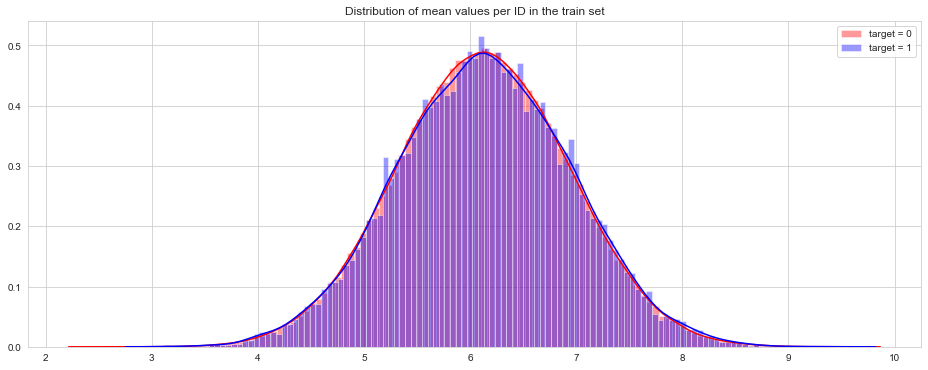

In [17]:
b0 = df_train.loc[df_train['target'] == 0]
b1 = df_train.loc[train['target'] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per ID in the train set")
sns.distplot(b0[features].mean(axis=1),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(b1[features].mean(axis=1),color="blue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

## 特徵分析

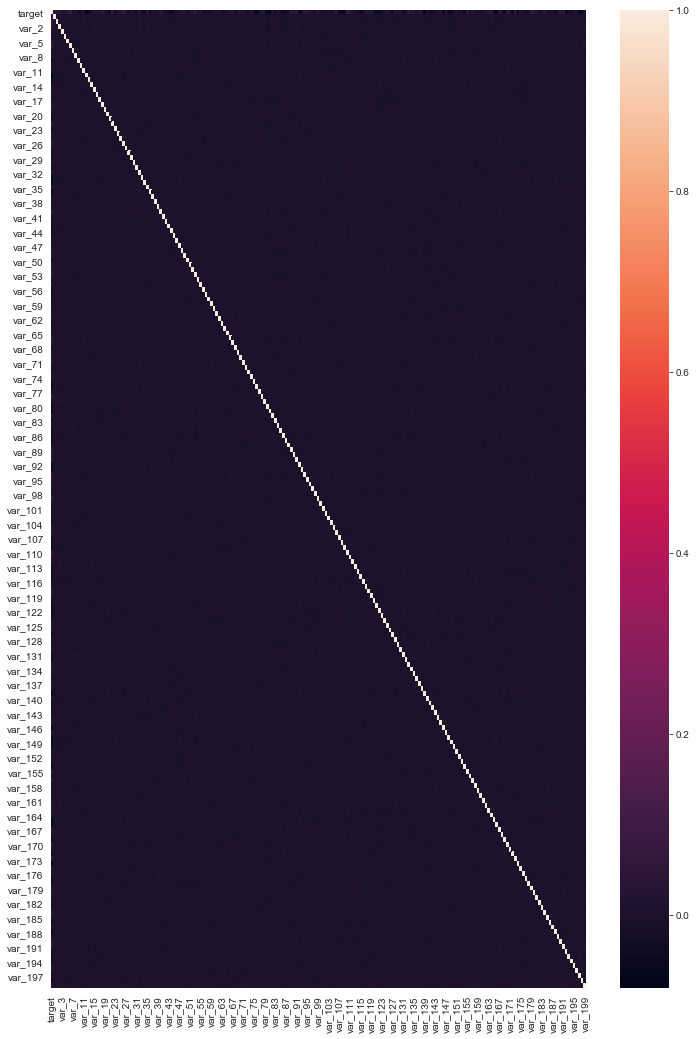

In [20]:
df_train_corr=df_train.corr()
plt.figure(figsize=(12,18))
sns.heatmap(df_train_corr)

In [21]:
%%time
correlations = df_train[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
# DataFrame.倆倆算相關係數.取絕對值.排列(?).排序.重新編號
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.tail(10)

CPU times: user 819 ms, sys: 51.1 ms, total: 871 ms
Wall time: 877 ms


,level_0,level_1,0
2440,var_44,var_13,0.007400
2441,var_13,var_44,0.007400
2442,var_0,var_6,0.007405
2443,var_6,var_0,0.007405
2444,var_32,var_12,0.007698
2445,var_12,var_32,0.007698
2446,var_26,var_48,0.007843
2447,var_48,var_26,0.007843
2448,var_2,var_13,0.008766
2449,var_13,var_2,0.008766


#### 當相關性接近零時，就沒有線性關係彼此獨立。隨著相關性接近正負1時關係更強，表示兩個變量之間具有完美的線性關係。

In [47]:
from sklearn.preprocessing import StandardScaler
standardized_train=StandardScaler().fit_transform(df_train.set_index(['ID_code','target']))

In [48]:
standardized_train

array([[-0.5785063 , -1.27370941,  0.45270831, ..., -0.3735123 ,
        -1.02685254,  0.21405833],
       [ 0.27017479, -0.62203156,  1.19259717, ..., -0.12904689,
         0.82473145,  0.50559073],
       [-0.68271699, -0.27591876,  0.5180986 , ..., -0.69454939,
        -0.38198446,  0.35659614],
       ...,
       [ 0.17875149, -0.84538988, -0.07655857, ..., -0.20865541,
        -0.67730409,  0.72091584],
       [-0.31837505, -1.72400671,  1.09838053, ...,  1.22158652,
        -0.11409473, -1.01298922],
       [ 0.06438998, -1.00805006,  0.53243592, ..., -0.78326842,
        -1.24333614,  0.33188026]])

In [53]:
from sklearn.decomposition import PCA 
k=140
pca=PCA(n_components=k,random_state=101,whiten=True)
pca.fit(standardized_train)

PCA(copy=True, iterated_power='auto', n_components=140, random_state=101,
  svd_solver='auto', tol=0.0, whiten=True)

In [54]:
pca.explained_variance_ratio_

array([0.00603916, 0.00528091, 0.00526993, 0.00526137, 0.005257  ,
       0.00524978, 0.00524084, 0.00523904, 0.0052304 , 0.00522656,
       0.00522356, 0.00521784, 0.00521248, 0.00521166, 0.00520772,
       0.00520272, 0.00519959, 0.00519712, 0.00518586, 0.00518373,
       0.00518168, 0.00517644, 0.00517083, 0.00516897, 0.00516523,
       0.00516117, 0.0051574 , 0.00515435, 0.00515151, 0.00514642,
       0.00514327, 0.00513876, 0.00513482, 0.00513186, 0.00512988,
       0.00512375, 0.00511951, 0.00511932, 0.00511541, 0.00511453,
       0.00511073, 0.00510485, 0.00510255, 0.00509786, 0.00509358,
       0.00509278, 0.00508878, 0.00508659, 0.00508127, 0.0050809 ,
       0.00507781, 0.00507407, 0.00507228, 0.00506823, 0.00506792,
       0.00506499, 0.00506394, 0.00505744, 0.00505213, 0.00505019,
       0.00504768, 0.00504441, 0.00504146, 0.00503639, 0.00503475,
       0.00503154, 0.00502947, 0.00502751, 0.00502496, 0.00502146,
       0.00502094, 0.00501531, 0.00501324, 0.00501004, 0.00500

In [55]:
sum(pca.explained_variance_ratio_)

0.7041412247707287

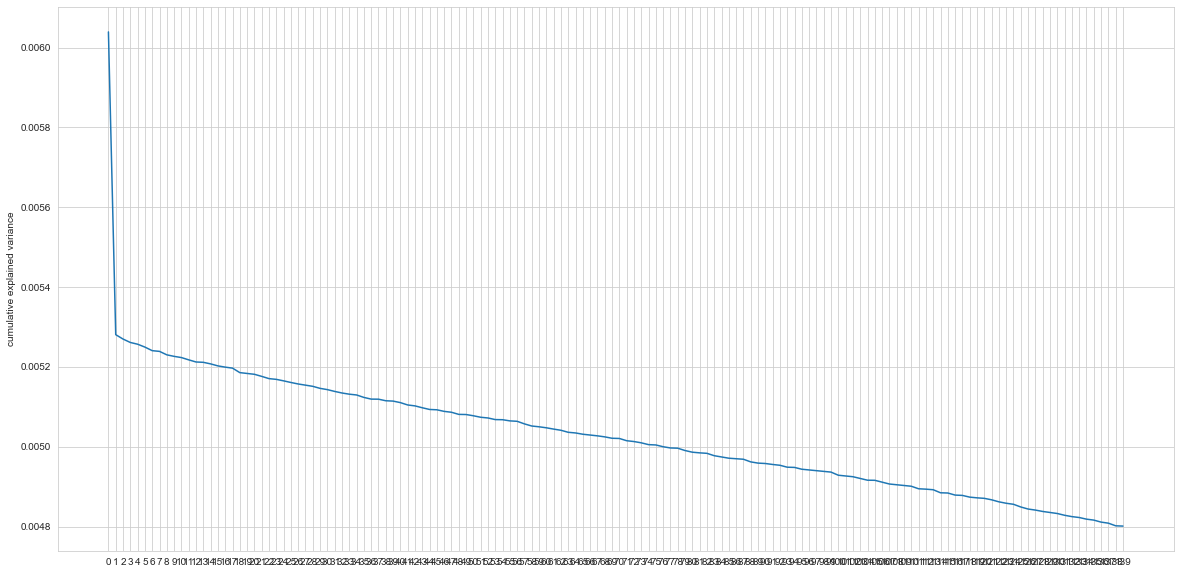

In [58]:
plt.figure(figsize=(20,10))
plt.plot(pca.explained_variance_ratio_)
plt.xticks(range(k))
plt.ylabel('cumulative explained variance')
plt.show()

圖中有一個彎頭觀察點，則該點的x值（特徵數量）通常是PCA的理想組分數量，但是在這種情況下，每個主組分幾乎無法解釋總方差（例如，第一個主要成分僅解釋了總方差的0.6％）。即使我們將由80個主要成分解釋的所有方差相加，也只有40％。
當維數很大且許多特徵相互關聯時，PCA最佳。

0    174789
1     19405
Name: target, dtype: int64


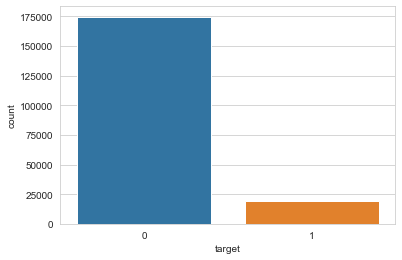

In [28]:
print(df_train['target'].value_counts())
sns.countplot(x='target', data=df_train.drop('ID_code',1))

In [12]:
#segment traget and input
X = df_train.drop(['target', 'ID_code'],1)
y = df_train['target']

In [13]:
#將資料分成訓練組及測試組
from sklearn.model_selection import train_test_split
#test_size代表測試組比例。random_state代表設定隨機種子，讓測試結果可被重複
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

all done!
all done!
準確率:

訓練集:  0.9153 測試集:  0.914880 精準率:

訓練集:  0.6926 測試集:  0.6824 召回率:

訓練集:  0.2739 測試集:  0.2736 f1-score:

訓練集:  0.3926 測試集:  0.3906 auc:

訓練集:  0.8624 測試集:  0.8581 準確率:

訓練集:  0.1073 測試集:  0.099705 精準率:

訓練集:  0.1007 測試集:  0.0997 召回率:

訓練集:  1.0000 測試集:  1.0000 f1-score:

訓練集:  0.1830 測試集:  0.1813 auc:

訓練集:  0.6730 測試集:  0.6315 準確率:

訓練集:  0.9062 測試集:  0.897702 精準率:

訓練集:  0.7731 測試集:  0.3735 召回率:

訓練集:  0.0881 測試集:  0.0384 f1-score:

訓練集:  0.1581 測試集:  0.0697 auc:

訓練集:  0.6770 測試集:  0.6418 準確率:

訓練集:  0.9027 測試集:  0.901653 精準率:

訓練集:  0.9764 測試集:  0.8911 召回率:

訓練集:  0.0274 測試集:  0.0155 f1-score:

訓練集:  0.0533 測試集:  0.0305 auc:

訓練集:  0.8655 測試集:  0.8280 準確率:

訓練集:  0.9188 測試集:  0.908232 精準率:

訓練集:  0.9740 測試集:  0.8489 召回率:

訓練集:  0.1932 測試集:  0.0968 f1-score:

訓練集:  0.3224 測試集:  0.1738 auc:

訓練集:  0.9323 測試集:  0.8611 

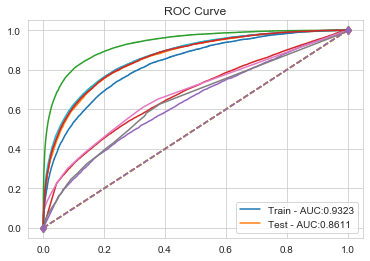

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


#歸一化
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

#邏輯迴歸模型
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_std,y_train)

#svm
from sklearn.svm import SVC
svm_linear = SVC(kernel = 'poly',max_iter=1000,probability=True).fit(X_train_std,y_train)

#決策樹模型
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=8)
dtc.fit(X_train_std,y_train)

#xgboost sklearn版
from xgboost.sklearn import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train_std,y_train)

#lightgbm sklearn版
from lightgbm.sklearn import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(X_train_std,y_train)

print('all done!')

print('all done!')


#模型評估
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

def draw_metrics(clf, X_train, X_test, y_train, y_test):
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    y_train_prob = clf.predict_proba(X_train)[:,1]
    y_test_prob = clf.predict_proba(X_test)[:,1]
    
    #準確率
    print('準確率:\n')
    print('訓練集: ','%.4f'%accuracy_score(y_train,y_train_pred), end=' ')
    print('測試集: ','%4f'%accuracy_score(y_test,y_test_pred),end=' ')
    
    #精準率
    print('精準率:\n')
    print('訓練集: ','%.4f'%precision_score(y_train,y_train_pred),end=' ')
    print('測試集: ','%.4f'%precision_score(y_test,y_test_pred),end=' ')
    
    #召回率
    print('召回率:\n')
    print('訓練集: ','%.4f'%recall_score(y_train,y_train_pred),end=' ')
    print('測試集: ','%.4f'%recall_score(y_test,y_test_pred),end=' ')
    
    #f1_score
    print('f1-score:\n')
    print('訓練集: ','%.4f'%f1_score(y_train,y_train_pred),end=' ')
    print('測試集: ','%.4f'%f1_score(y_test,y_test_pred),end=' ')
    
    #auc
    print('auc:\n')
    print('訓練集: ','%.4f'%roc_auc_score(y_train,y_train_prob),end=' ')
    print('測試集: ','%.4f'%roc_auc_score(y_test,y_test_prob),end=' ')
    
    #roc曲線
    fpr_train, tpr_train, thred_train = roc_curve(y_train,y_train_prob,pos_label=1)
    fpr_test, tpr_test, thred_test = roc_curve(y_test,y_test_prob,pos_label=1)
    
    label = ['Train - AUC:{:.4f}'.format(auc(fpr_train,tpr_train)),
             'Test - AUC:{:.4f}'.format(auc(fpr_test,tpr_test))]
    plt.plot(fpr_train,tpr_train)
    plt.plot(fpr_test,tpr_test)
    plt.plot([0,1],[0,1],'d--')
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    plt.legend(label, loc = 4)
    plt.title('ROC Curve')
    
    
draw_metrics(lr, X_train_std,X_test_std,y_train,y_test)
draw_metrics(svm_linear, X_train_std,X_test_std,y_train,y_test)
draw_metrics(dtc, X_train_std,X_test_std,y_train,y_test)
draw_metrics(xgbc, X_train_std,X_test_std,y_train,y_test)
draw_metrics(lgb, X_train_std,X_test_std,y_train,y_test)


In [14]:
X_train.shape

(135828, 200)

In [15]:
X_test.shape

(58212, 200)

In [16]:
from sklearn.linear_model import LogisticRegression
lrg = LogisticRegression(solver='lbfgs')

lrg.fit(X_train, y_train)

y_pred_lrg = lrg.predict(X_test)
recall_score(y_test, y_pred_lrg)

0.23862853204686424

In [17]:
#Accuracy of the model
lrg_score=lrg.score(X_train,y_train)
print('Accuracy of the lr_model :',lrg_score)

Accuracy of the lr_model : 0.9124480961215655


In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
#Cross validation prediction
cv_predict=cross_val_predict(lrg,X_test,y_test,cv=5)
#Cross validation score
cv_score=cross_val_score(lrg,X_test,y_test,cv=5)
print('cross_val_score :',np.average(cv_score))

cross_val_score : 0.9118738001892789


ROC score : 0.6090836374642431


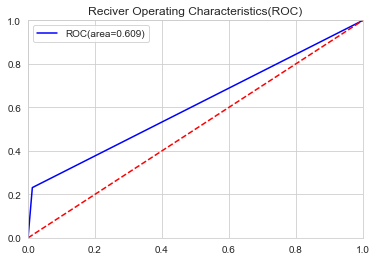

AUC: 0.6090836374642431


In [19]:
#ROC_AUC score
roc_score=roc_auc_score(y_test,cv_predict)
print('ROC score :',roc_score)

#ROC_AUC curve
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_test,cv_predict)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.show()
print('AUC:',roc_auc)

In [20]:
from sklearn.svm import SVC
svm = SVC(kernel = 'poly',max_iter=1000)

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
recall_score(y_test, y_pred_svm)

0.5461750516884907

In [21]:
#Accuracy of the model
svm_score=svm.score(X_train,y_train)
print('Accuracy of the lr_model :',svm_score)

Accuracy of the lr_model : 0.5413905822069087


In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
#Cross validation prediction
cv_predict=cross_val_predict(svm,X_test,y_test,cv=5)
#Cross validation score
cv_score=cross_val_score(svm,X_test,y_test,cv=5)
print('cross_val_score :',np.average(cv_score))

cross_val_score : 0.5915279414163284


ROC score : 0.5604078035970961


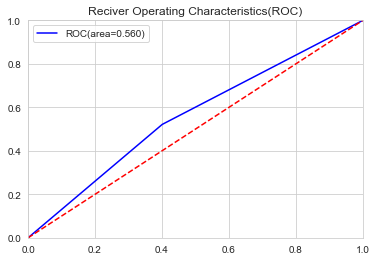

AUC: 0.5604078035970961


In [23]:
#ROC_AUC score
roc_score=roc_auc_score(y_test,cv_predict)
print('ROC score :',roc_score)

#ROC_AUC curve
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_test,cv_predict)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.show()
print('AUC:',roc_auc)

## 使用過採樣smote方法改善

In [24]:
#segment traget and input
X_train = df_train.drop(['target', 'ID_code'],1)
y_train = df_train['target']

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Number transactions X_train dataset:  (194040, 200)
Number transactions y_train dataset:  (194040,)
Before OverSampling, counts of label '1': 19384
Before OverSampling, counts of label '0': 174656 



In [25]:
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

#seed the random_state for reproducablity, for now
sm = SMOTE(random_state=42)
X_train_re, y_train_re = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_re.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_re.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_re==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_re==0)))

After OverSampling, the shape of train_X: (349312, 200)
After OverSampling, the shape of train_y: (349312,) 

After OverSampling, counts of label '1': 174656
After OverSampling, counts of label '0': 174656


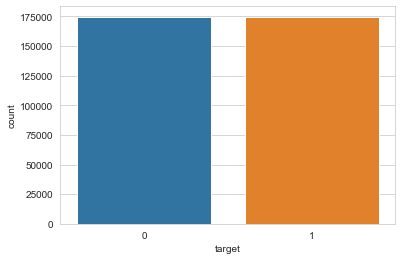

In [26]:
re_samp = pd.DataFrame(y_train_re, columns=['target'])
sns.countplot(x='target', data=re_samp)

In [27]:
#segment traget and input
X = X_train_re
y = y_train_re

In [28]:
#將資料分成訓練組及測試組
from sklearn.model_selection import train_test_split
#test_size代表測試組比例。random_state代表設定隨機種子，讓測試結果可被重複
X_train_ree, X_test_ree, y_train_ree, y_test_ree = train_test_split(X_train_re, y_train_re, test_size=0.3, random_state=101)


In [29]:
X_test_ree.shape

(104794, 200)

In [30]:
from sklearn.linear_model import LogisticRegression
lrg= LogisticRegression(solver='lbfgs')

lrg.fit(X_train_ree, y_train_ree)

y_pred_lrg = lrg.predict(X_test_ree)
recall_score(y_test_ree, y_pred_lrg)


0.8025721634752786

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
#Cross validation prediction
cv_predict_smote=cross_val_predict(lrg,X_test_ree,y_test_ree,cv=5)
#Cross validation score
cv_score_smote=cross_val_score(lrg,X_test_ree,y_test_ree,cv=5)
print('cross_val_score :',np.average(cv_score_smote))

cross_val_score : 0.7872874574360756


ROC score : 0.7872686178967667


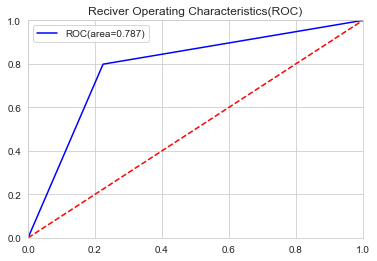

AUC: 0.7872686178967667


In [33]:
#ROC_AUC score
roc_score_smote=roc_auc_score(y_test_ree,cv_predict_smote)
print('ROC score :',roc_score_smote)

#ROC_AUC curve
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_test_ree,cv_predict_smote)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.show()
print('AUC:',roc_auc)

In [34]:
#使用和函數解決非線性的分類
from sklearn.svm import SVC
svm = SVC(kernel = 'poly',max_iter=1000)

svm.fit(X_train_ree, y_train_ree)

y_pred_svm = svm.predict(X_train_ree)
recall_score(y_train_ree, y_pred_svm)

0.7225610005647821

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
#Cross validation prediction
cv_predict_smote=cross_val_predict(svm,X_test_ree,y_test_ree,cv=5)
#Cross validation score
cv_score_smote=cross_val_score(svm,X_test_ree,y_test_ree,cv=5)
print('cross_val_score :',np.average(cv_score_smote))

cross_val_score : 0.6793804299234837


ROC score : 0.6793068818914973


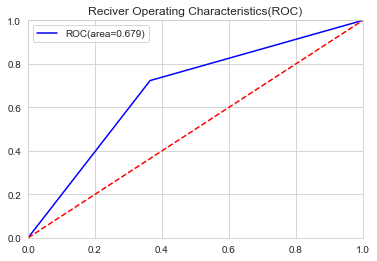

AUC: 0.6793068818914973


In [36]:
#ROC_AUC score
roc_score_smote=roc_auc_score(y_test_ree,cv_predict_smote)
print('ROC score :',roc_score_smote)

#ROC_AUC curve
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_test_ree,cv_predict_smote)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.show()
print('AUC:',roc_auc)